# PROJETO FINAL DE MACHINE LEARNING II

### Objetivos: 
Com o ferramental em análise e em ciência de dados adquirido até o momento, a ideia
é, com este projeto, avaliar um dataset sob três óptica:

1. Uma análise exploratória de dados; 
2. Uma análise de segmentação;
3. Uma análise preditiva.

In [1]:
import kagglehub

# Essa porção do código baixa diretamente a base de dados para o cache do usuário
# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\filip\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv(path+'/diamonds.csv')

| **Característica** | **Descrição** |
|---------------------|---------------|
| `x`                | Comprimento (mm) |
| `y`                | Largura (mm)     |
| `z`                | Profundidade (mm) |
| `carat`            | Peso em quilates do diamante |
| `cut`              | Qualidade do corte do diamante. Qualidade em ordem crescente: Fair (Regular), Good (Bom), Very Good (Muito Bom), Premium, Ideal |
| `color`            | Cor do diamante, sendo D a melhor e J a pior |
| `clarity`          | Quão visíveis são as inclusões no diamante (em ordem da melhor para a pior): FL = impecável, IF, I1, I2, I3 (nível 3 de inclusões) |
| `depth`            | Profundidade %: A altura de um diamante, medida da base (culet) até a mesa, dividida pelo diâmetro médio da cintura |
| `table`            | Tabela %: A largura da mesa do diamante expressa como uma porcentagem do seu diâmetro médio |
| `price`            | O preço do diamante |


In [4]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26194,26195,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
43529,43530,0.49,Good,F,VS1,63.6,59.0,1426,4.95,4.92,3.14
43284,43285,0.31,Very Good,D,SI1,60.4,60.0,507,4.40,4.44,2.67
4213,4214,0.70,Very Good,D,VS1,61.2,56.0,3567,5.68,5.75,3.50
50395,50396,0.59,Very Good,D,VS1,62.6,58.0,2254,5.34,5.39,3.36
12717,12718,0.32,Ideal,E,VS2,61.8,54.0,599,4.40,4.43,2.73
2163,2164,0.74,Ideal,G,SI1,61.3,57.0,3130,5.81,5.83,3.57
24024,24025,1.80,Good,F,SI2,57.9,58.0,12196,8.08,8.13,4.69
39749,39750,0.50,Premium,H,SI1,62.3,59.0,1094,5.02,4.99,3.12
43272,43273,0.30,Very Good,I,SI1,63.4,57.0,506,4.25,4.23,2.69


A coluna Unnamed parece ser um índice

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Todos os atributos possuem 53.940 valores não nulos, o que indica a ausência de valores faltantes. Os atributos 'cut', 'color' e 'clarity' têm o tipo de dado "object" e precisam ser convertidos em variáveis numéricas durante o pré-processamento, antes de serem utilizados nos algoritmos.

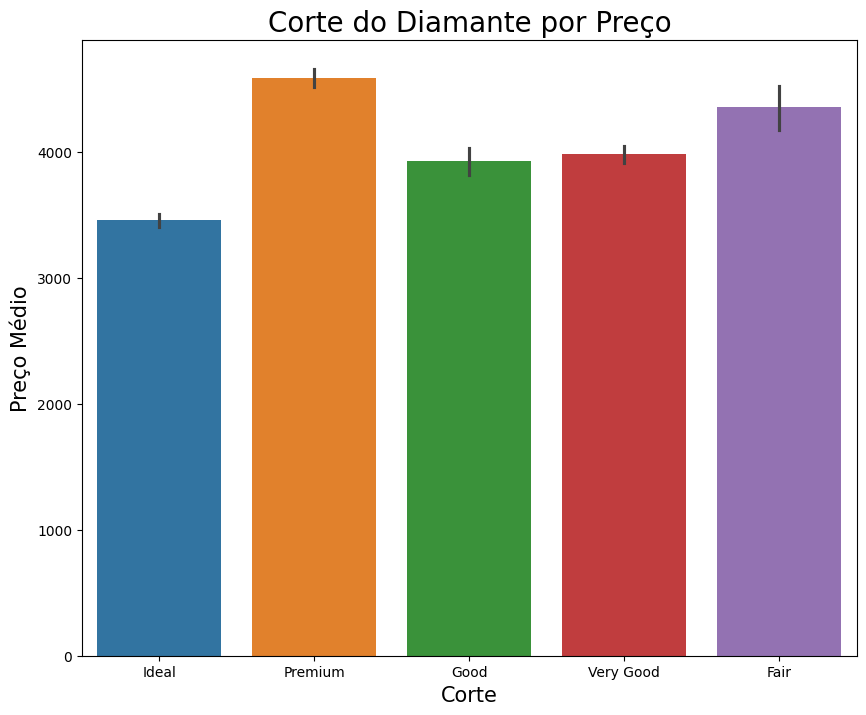

In [6]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="cut", y="price", data=df, hue='cut')

# Personalização do título e rótulos
ax.set_title("Corte do Diamante por Preço", fontsize=20)
ax.set_ylabel("Preço Médio", fontsize=15)
ax.set_xlabel("Corte", fontsize=15)

plt.show()

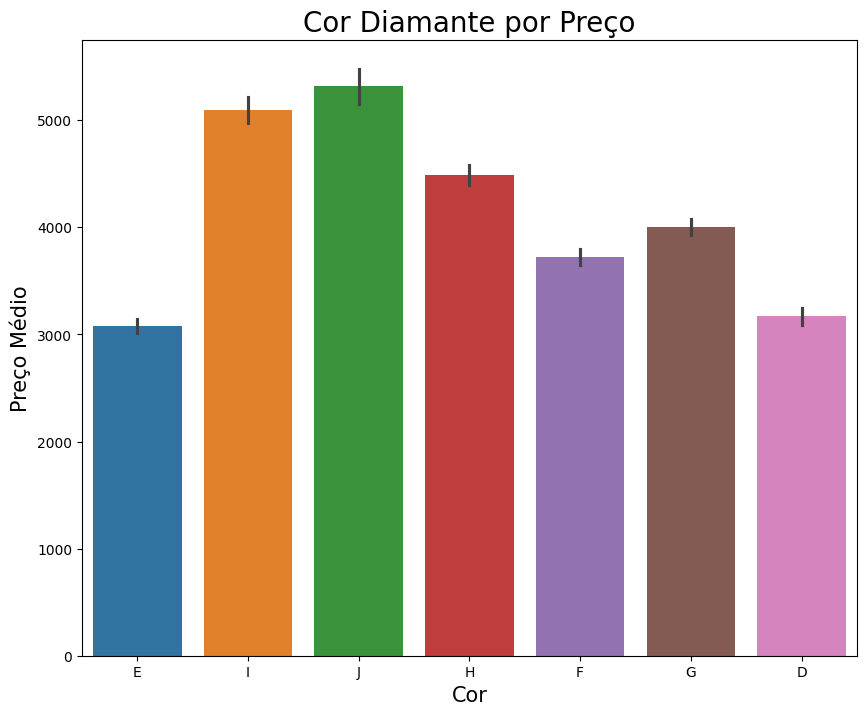

In [7]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="color", y="price", data=df, hue='color')

# Personalização do título e rótulos
ax.set_title("Cor Diamante por Preço", fontsize=20)
ax.set_ylabel("Preço Médio", fontsize=15)
ax.set_xlabel("Cor", fontsize=15)


plt.show()

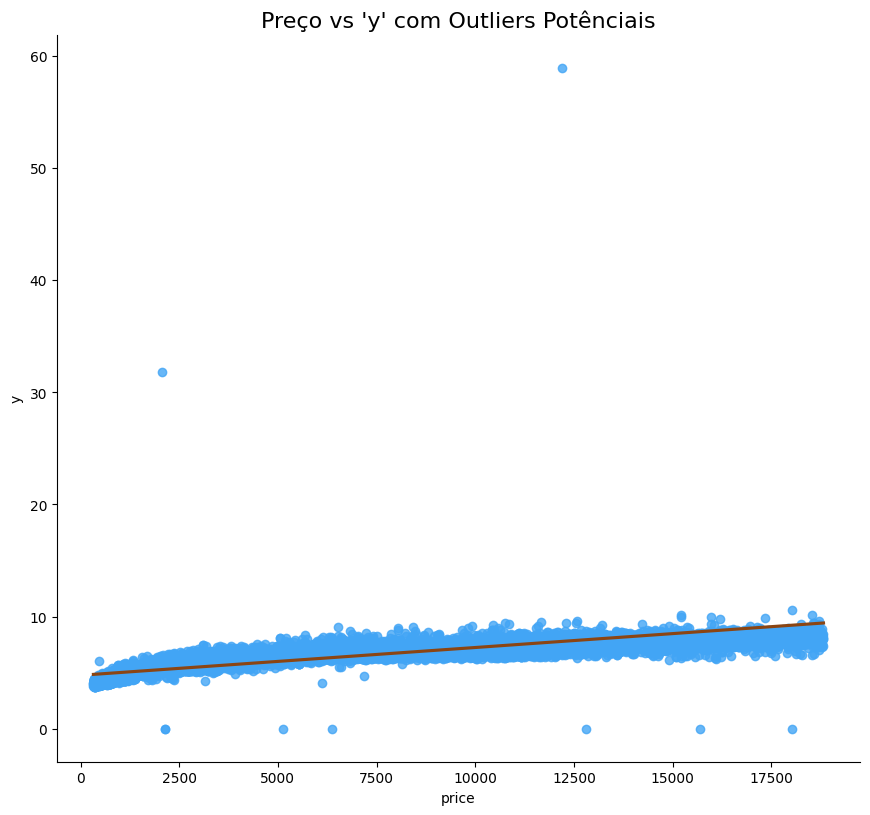

In [8]:
# Gráfico simples de regressão com foco em outliers
sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#42a5f5"}, line_kws={"color": "#8B4513"}, height=8, aspect=1.1)

# Adicionando título
plt.title("Preço vs 'y' com Outliers Potênciais", fontsize=16)

# Mostrando o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

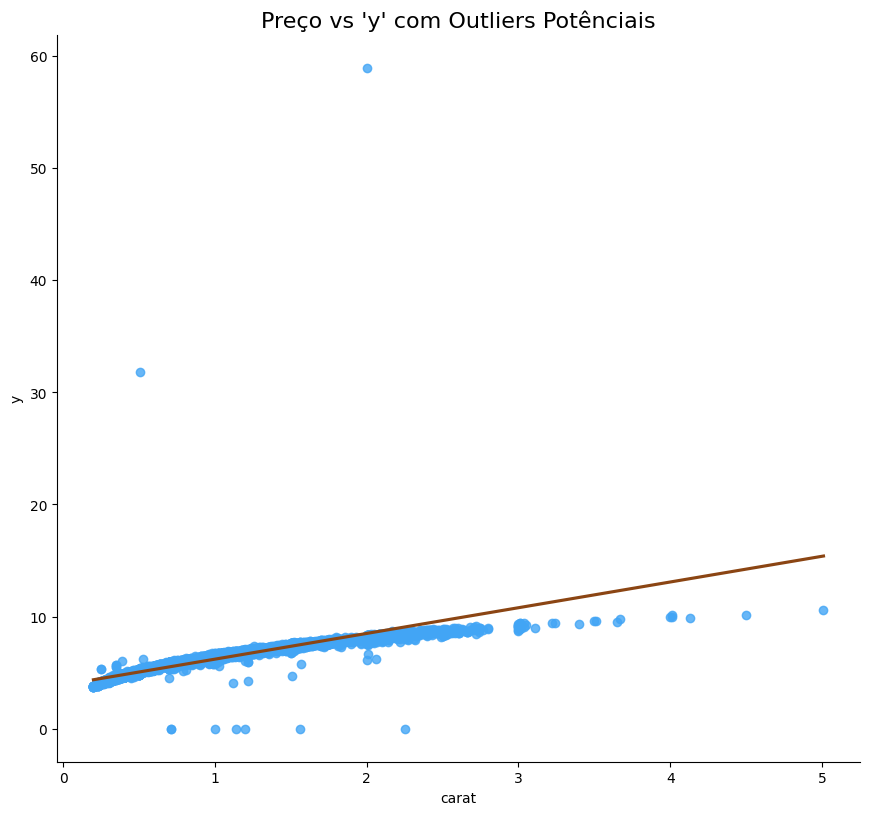

In [9]:
# Gráfico simples de regressão com foco em outliers

plt.figure(figsize=(12,8))
sns.lmplot(x="carat", y="y", data=df, scatter_kws={"color": "#42a5f5"}, line_kws={"color": "#8B4513"}, height=8, aspect=1.1)

# Adicionando título
plt.title("Preço vs 'y' com Outliers Potênciais", fontsize=16)

# Mostrando o gráfico
plt.show()

In [10]:
# Removendo a coluna "Unnamed"
data_df = df.drop(["Unnamed: 0"], axis=1)

In [11]:
# Fazendo uma copia do df oroginal
data1 = data_df.copy()

# Aplicando label encoder para as colunas categorias
colunas = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in colunas:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


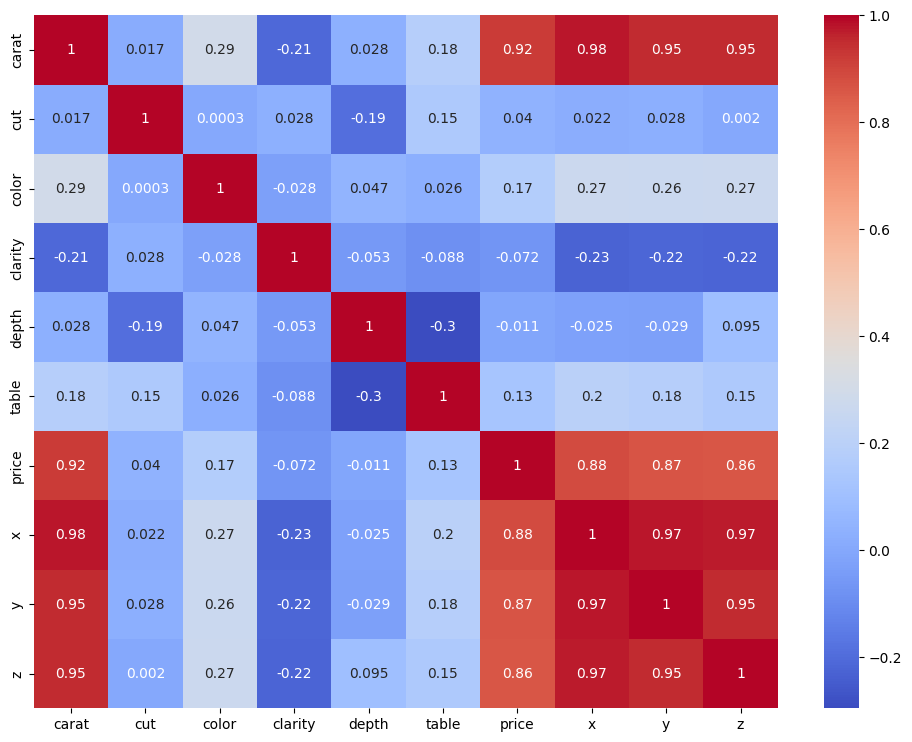

In [16]:
# examinando a matrix de correlação usando heatmap

# Calcula a matriz de correlação
corrmat = data1.corr()

# Cria a figura com tamanho ajustado
plt.figure(figsize=(12, 9))

# Plota o heatmap
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

# Exibe o gráfico
plt.show()

In [13]:
from scipy.stats import chi2_contingency

def calculate_chi2(df, target_column):
    """Calculates chi-squared test for categorical features against a target column."""
    results = {}

    for col in df.columns:
        if col != target_column:  
            contingency_table = pd.crosstab(df[col], df[target_column])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[col] = {'chi2': chi2, 'p-value': p}
    return results


chi2_results = calculate_chi2(data1, 'price')


for col, values in chi2_results.items():
  print(f"Chi-squared test for '{col}' vs 'price':")
  print(f"  Chi2 statistic: {values['chi2']}")
  print(f"  P-value: {values['p-value']}")
  print("-" * 20)

Chi-squared test for 'carat' vs 'price':
  Chi2 statistic: 8368938.99754757
  P-value: 0.0
--------------------
Chi-squared test for 'cut' vs 'price':
  Chi2 statistic: 58970.25277540097
  P-value: 1.16375276e-316
--------------------
Chi-squared test for 'color' vs 'price':
  Chi2 statistic: 111326.28294795017
  P-value: 0.0
--------------------
Chi-squared test for 'clarity' vs 'price':
  Chi2 statistic: 127923.174260438
  P-value: 0.0
--------------------
Chi-squared test for 'depth' vs 'price':
  Chi2 statistic: 2092629.5176975345
  P-value: 1.0
--------------------
Chi-squared test for 'table' vs 'price':
  Chi2 statistic: 1458379.4928022958
  P-value: 0.9749051869658266
--------------------
Chi-squared test for 'x' vs 'price':
  Chi2 statistic: 11143992.807387773
  P-value: 0.0
--------------------
Chi-squared test for 'y' vs 'price':
  Chi2 statistic: 10997185.071596218
  P-value: 0.0
--------------------
Chi-squared test for 'z' vs 'price':
  Chi2 statistic: 7797366.276291687
 

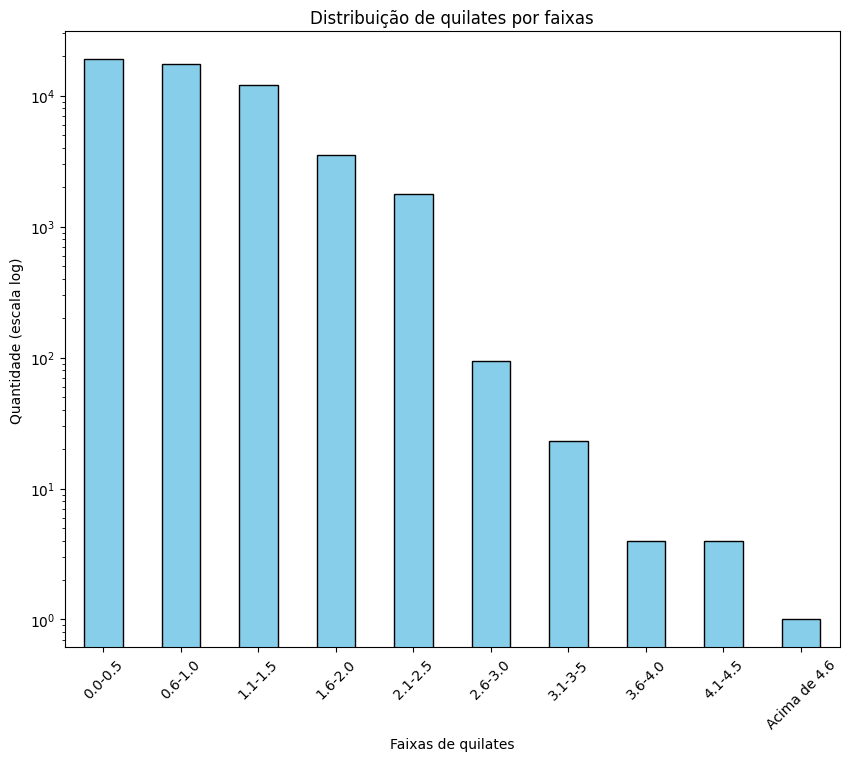

In [14]:
# Definir os bins e labels
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 6.0]  # Adjust these ranges as needed
labels = ['0.0-0.5', '0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3-5', '3.6-4.0', '4.1-4.5', 'Acima de 4.6']

# Categoriza os quilates nos bis definidos
df['carat range'] = pd.cut(df['carat'], bins=bins, labels=labels)


# Conta a ocorrência de quilates em cada faixa e plota
plt.figure(figsize=(10,8))

carat_counts = df['carat range'].value_counts().sort_index()
carat_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribuição de quilates por faixas')
plt.yscale('log')
plt.xlabel('Faixas de quilates')
plt.ylabel('Quantidade (escala log)')
plt.xticks(rotation=45)
plt.show()

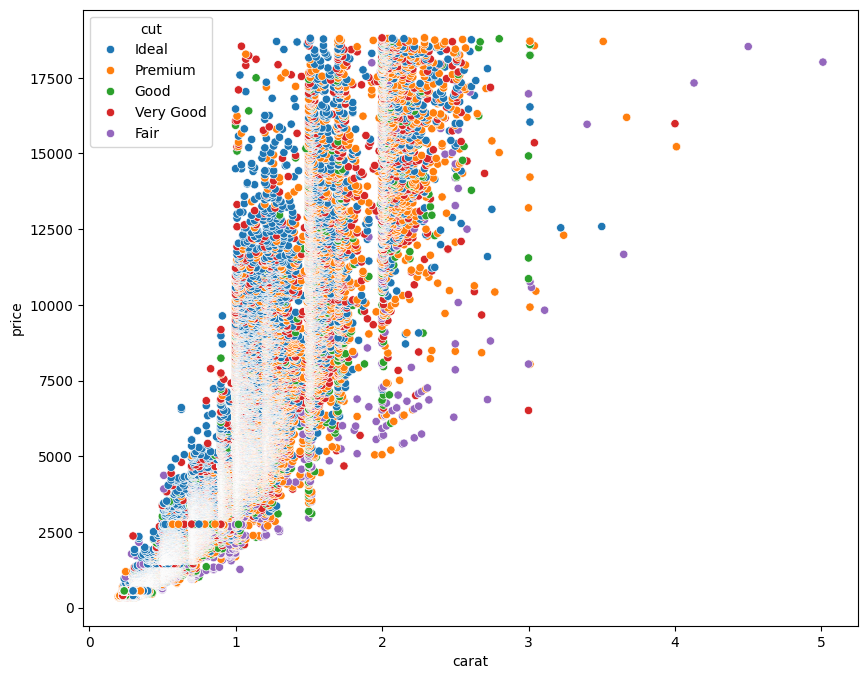

In [17]:
# Distribuição de preços por quilate, com corte como hue

plt.figure(figsize=(10,8))
sns.scatterplot(df, x='carat', y='price', hue='cut')
plt.show()